In [1]:
#Imports

import pandas as pd
import requests
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np





In [2]:
#API Pulls

years = range(2010, 2024)
records = []

for y in years:
    try:
        base_url = f"https://api.census.gov/data/{y}/acs/acs5"
        geo = {"for": "place:51000", "in": "state:36"}  # New York City

        #Median Gross Rent
        rent_params = {"get": "NAME,B25064_001E", **geo}
        rent_resp = requests.get(base_url, params=rent_params)
        rent_resp.raise_for_status()
        rent_val = int(rent_resp.json()[1][1])

        #Median Household Income
        inc_params = {"get": "B19013_001E", **geo}
        inc_resp = requests.get(base_url, params=inc_params)
        inc_resp.raise_for_status()
        inc_val = int(inc_resp.json()[1][0])

        #Median Household Income by Race
        race_params = {"get": "B19013B_001E,B19013H_001E,B19013I_001E", **geo}
        race_resp = requests.get(base_url, params=race_params)
        race_resp.raise_for_status()
        race_js = race_resp.json()[1]
        inc_black = int(race_js[0])
        inc_white = int(race_js[1])
        inc_hisp = int(race_js[2])

        #Median Earnings by Sex
        sex_params = {"get": "B20017_002E,B20017_003E", **geo}
        sex_resp = requests.get(base_url, params=sex_params)
        sex_resp.raise_for_status()
        sex_js = sex_resp.json()[1]
        inc_male = int(sex_js[0])
        inc_female = int(sex_js[1])

        #Median Household Income by Age of Householder
        age_params = {"get": "B19049_002E,B19049_003E,B19049_004E,B19049_005E", **geo}
        age_resp = requests.get(base_url, params=age_params)
        age_resp.raise_for_status()
        age_js = age_resp.json()[1]
        inc_under25 = int(age_js[0])
        inc_25_44 = int(age_js[1])
        inc_45_64 = int(age_js[2])
        inc_65plus = int(age_js[3])

        #Combine into one record
        records.append({
            "Year": y,
            "Median_Gross_Rent_USD": rent_val,
            "Median_Household_Income_USD": inc_val,
            "Median_Household_Income_Black_USD": inc_black,
            "Median_Household_Income_White_USD": inc_white,
            "Median_Household_Income_Hispanic_USD": inc_hisp,
            "Median_Earnings_Male_USD": inc_male,
            "Median_Earnings_Female_USD": inc_female,
            "Income_Under25_USD": inc_under25,
            "Income_25to44_USD": inc_25_44,
            "Income_45to64_USD": inc_45_64,
            "Income_65plus_USD": inc_65plus,
            "Annual_Rent_USD": rent_val * 12,
            "Rent_to_Income_Ratio": (rent_val * 12) / inc_val
        })

    except Exception as e:
        print(f"Skipped {y}: {e}")




In [8]:
#Create DataFrame and Check
df = pd.DataFrame(records).sort_values("Year")
df.head()

,Year,Median_Gross_Rent_USD,Median_Household_Income_USD,Median_Household_Income_Black_USD,Median_Household_Income_White_USD,Median_Household_Income_Hispanic_USD,Median_Earnings_Male_USD,Median_Earnings_Female_USD,Income_Under25_USD,Income_25to44_USD,Income_45to64_USD,Income_65plus_USD,Annual_Rent_USD,Rent_to_Income_Ratio
0,2010,1071,50285,40575,68952,35603,35873,45122,33606,57770,55721,27868,12852,0.255583
1,2011,1125,51270,41263,71246,36006,36463,46388,33972,60108,56607,28776,13500,0.263312
2,2012,1167,51865,41605,72295,36012,36974,47939,32476,61285,56632,29527,14004,0.270009
3,2013,1200,52259,41936,73203,36283,37362,48817,33179,61991,56883,30194,14400,0.275551
4,2014,1234,52737,41729,75596,36436,37448,49478,33481,63235,57085,30957,14808,0.280790


In [4]:
#Renaming Columns

df.rename(columns={
    "Year": "Year",
    "Median_Gross_Rent_USD": "Median Gross Rent USD",
    "Median_Household_Income_USD": "Median Household Income USD",
    "Median_Household_Income_Black_USD": "Median Household Income Black USD",
    "Median_Household_Income_White_USD": "Median Household Income White USD",
    "Median_Household_Income_Hispanic_USD": "Median Household Income Hispanic USD",
    "Median_Earnings_Male_USD": "Median Earnings Male USD",
    "Median_Earnings_Female_USD": "Median Earnings Female USD",
    "Income_Under25_USD": "Income Under 25 USD",
    "Income_25to44_USD": "Income 25 to 44 USD",
    "Income_45to64_USD": "Income 45 to 64 USD",
    "Income_65plus_USD": "Income 65 Plus USD",
    "Annual_Rent_USD": "Annual Rent USD",
    "Rent_to_Income_Ratio": "Rent to Income Ratio"
}, inplace=True)

df.head()


,Year,Median Gross Rent USD,Median Household Income USD,Median Household Income Black USD,Median Household Income White USD,Median Household Income Hispanic USD,Median Earnings Male USD,Median Earnings Female USD,Income Under 25 USD,Income 25 to 44 USD,Income 45 to 64 USD,Income 65 Plus USD,Annual Rent USD,Rent to Income Ratio
0,2010,1071,50285,40575,68952,35603,35873,45122,33606,57770,55721,27868,12852,0.255583
1,2011,1125,51270,41263,71246,36006,36463,46388,33972,60108,56607,28776,13500,0.263312
2,2012,1167,51865,41605,72295,36012,36974,47939,32476,61285,56632,29527,14004,0.270009
3,2013,1200,52259,41936,73203,36283,37362,48817,33179,61991,56883,30194,14400,0.275551
4,2014,1234,52737,41729,75596,36436,37448,49478,33481,63235,57085,30957,14808,0.280790


In [5]:
#Descriptive Statistics



num_df = df.select_dtypes(include='number')

print("=== Basic Descriptive Statistics ===")
print(num_df.describe().round(1).T)

# Mean & Median
print("\n=== Mean and Median (Rounded to 1 Decimal) ===")
for col in num_df.columns:
    mean_val = round(num_df[col].mean(), 1)
    median_val = round(num_df[col].median(), 1)
    print(f"{col}: Mean = {mean_val}, Median = {median_val}")

# Mode
print("\n=== Mode (Rounded to 1 Decimal) ===")
for col in num_df.columns:
    mode_val = round(float(stats.mode(num_df[col], keepdims=True).mode[0]), 1)
    print(f"{col}: Mode = {mode_val}")

# Range
print("\n=== Range (Max - Min, Rounded to 1 Decimal) ===")
for col in num_df.columns:
    value_range = round(num_df[col].max() - num_df[col].min(), 1)
    print(f"{col}: Range = {value_range}")



=== Basic Descriptive Statistics ===
                                      count     mean      std      min  \
Year                                   14.0   2016.5      4.2   2010.0   
Median Gross Rent USD                  14.0   1363.3    216.0   1071.0   
Median Household Income USD            14.0  60253.6   9863.7  50285.0   
Median Household Income Black USD      14.0  46669.3   6663.6  40575.0   
Median Household Income White USD      14.0  86609.1  15279.9  68952.0   
Median Household Income Hispanic USD   14.0  41772.9   7015.2  35603.0   
Median Earnings Male USD               14.0  42049.0   6147.0  35873.0   
Median Earnings Female USD             14.0  54584.8   8347.5  45122.0   
Income Under 25 USD                    14.0  40317.6   8398.3  32476.0   
Income 25 to 44 USD                    14.0  73219.4  13680.6  57770.0   
Income 45 to 64 USD                    14.0  65064.5   9985.7  55721.0   
Income 65 Plus USD                     14.0  35829.4   6958.6  27868.0   
A

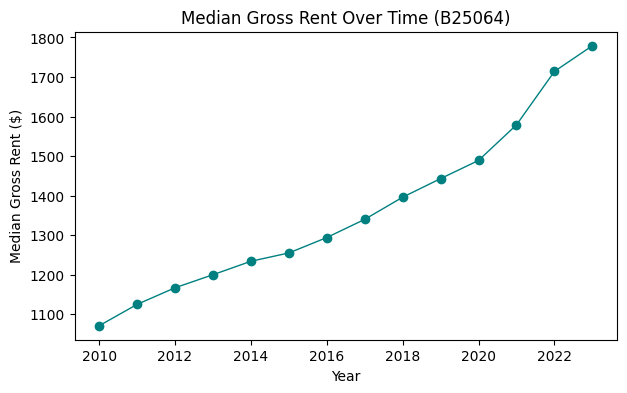

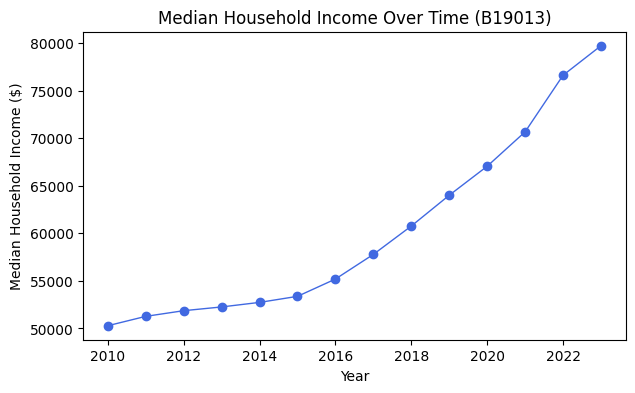

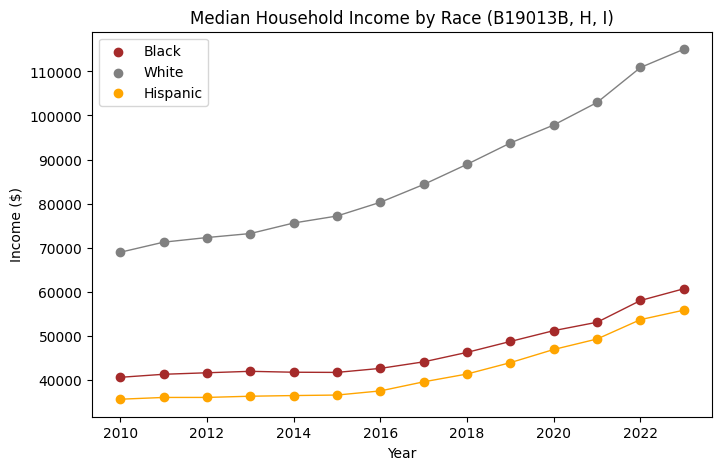

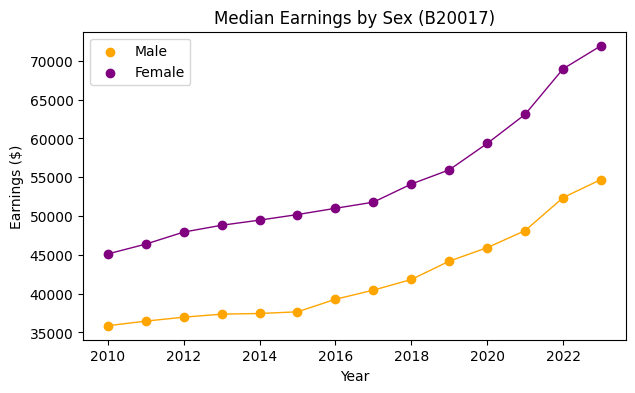

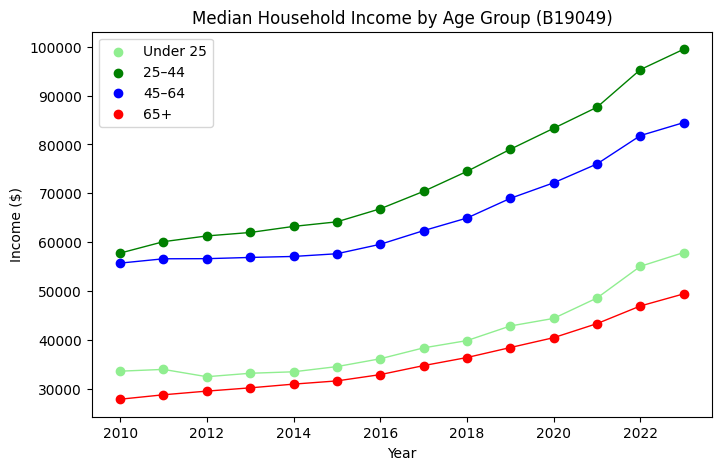

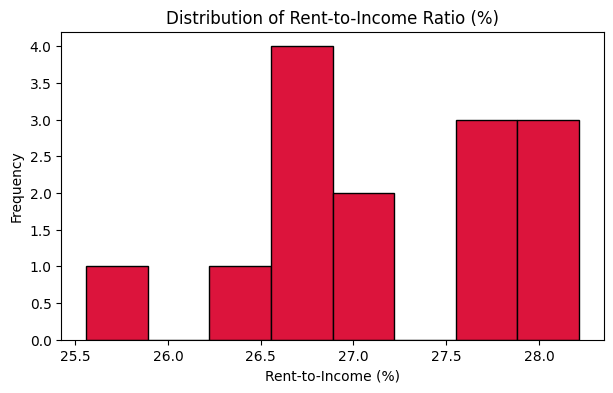

In [6]:
#Rent, Income, and Demographic Trends


#Median Gross Rent
plt.figure(figsize=(7,4))
plt.scatter(df["Year"], df["Median Gross Rent USD"], color="teal")
plt.plot(df["Year"], df["Median Gross Rent USD"], color="teal", linewidth=1)
plt.title("Median Gross Rent Over Time (B25064)")
plt.xlabel("Year")
plt.ylabel("Median Gross Rent ($)")
plt.show()


#Median Household Income
plt.figure(figsize=(7,4))
plt.scatter(df["Year"], df["Median Household Income USD"], color="royalblue")
plt.plot(df["Year"], df["Median Household Income USD"], color="royalblue", linewidth=1)
plt.title("Median Household Income Over Time (B19013)")
plt.xlabel("Year")
plt.ylabel("Median Household Income ($)")
plt.show()


#Household Income by Race
plt.figure(figsize=(8,5))
plt.scatter(df["Year"], df["Median Household Income Black USD"], label="Black", color="brown")
plt.scatter(df["Year"], df["Median Household Income White USD"], label="White", color="gray")
plt.scatter(df["Year"], df["Median Household Income Hispanic USD"], label="Hispanic", color="orange")
plt.plot(df["Year"], df["Median Household Income Black USD"], color="brown", linewidth=1)
plt.plot(df["Year"], df["Median Household Income White USD"], color="gray", linewidth=1)
plt.plot(df["Year"], df["Median Household Income Hispanic USD"], color="orange", linewidth=1)
plt.title("Median Household Income by Race (B19013B, H, I)")
plt.xlabel("Year")
plt.ylabel("Income ($)")
plt.legend()
plt.show()


#Median Earnings by Sex
plt.figure(figsize=(7,4))
plt.scatter(df["Year"], df["Median Earnings Male USD"], label="Male", color="orange")
plt.scatter(df["Year"], df["Median Earnings Female USD"], label="Female", color="purple")
plt.plot(df["Year"], df["Median Earnings Male USD"], color="orange", linewidth=1)
plt.plot(df["Year"], df["Median Earnings Female USD"], color="purple", linewidth=1)
plt.title("Median Earnings by Sex (B20017)")
plt.xlabel("Year")
plt.ylabel("Earnings ($)")
plt.legend()
plt.show()

#Median Household Income by Age
plt.figure(figsize=(8,5))
plt.scatter(df["Year"], df["Income Under 25 USD"], label="Under 25", color="lightgreen")
plt.scatter(df["Year"], df["Income 25 to 44 USD"], label="25–44", color="green")
plt.scatter(df["Year"], df["Income 45 to 64 USD"], label="45–64", color="blue")
plt.scatter(df["Year"], df["Income 65 Plus USD"], label="65+", color="red")
plt.plot(df["Year"], df["Income Under 25 USD"], color="lightgreen", linewidth=1)
plt.plot(df["Year"], df["Income 25 to 44 USD"], color="green", linewidth=1)
plt.plot(df["Year"], df["Income 45 to 64 USD"], color="blue", linewidth=1)
plt.plot(df["Year"], df["Income 65 Plus USD"], color="red", linewidth=1)
plt.title("Median Household Income by Age Group (B19049)")
plt.xlabel("Year")
plt.ylabel("Income ($)")
plt.legend()
plt.show()


#Rent-to-Income Ratio
plt.figure(figsize=(7,4))
plt.hist(df["Rent to Income Ratio"] * 100, bins=8, color="crimson", edgecolor="black")
plt.title("Distribution of Rent-to-Income Ratio (%)")
plt.xlabel("Rent-to-Income (%)")
plt.ylabel("Frequency")
plt.show()



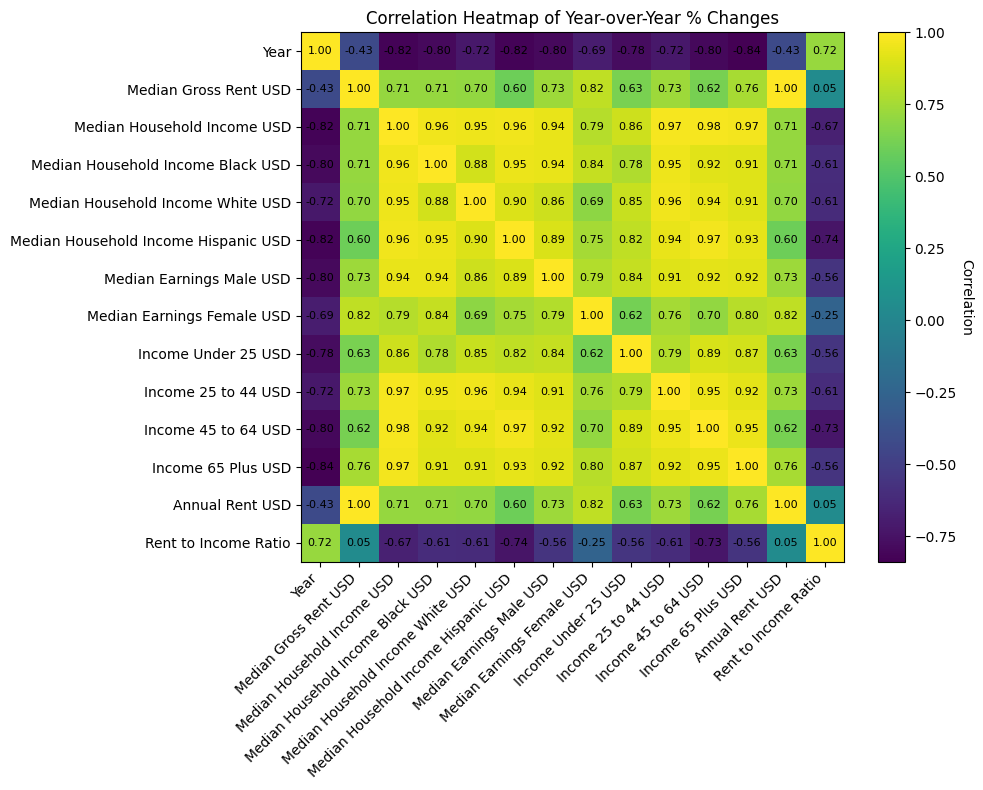

In [7]:

#Correlation Heatmap
num_df = df.select_dtypes(include='number')

pct = num_df.pct_change().dropna()

#Correlation on percent changes
corr = pct.corr()

#Plot heatmap
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(corr.values, aspect='auto')
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Correlation', rotation=270, labelpad=12)

ax.set_xticks(np.arange(corr.shape[1]))
ax.set_yticks(np.arange(corr.shape[0]))
ax.set_xticklabels(corr.columns, rotation=45, ha='right')
ax.set_yticklabels(corr.index)

for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        ax.text(j, i, f"{corr.values[i, j]:.2f}", ha='center', va='center', fontsize=8)

ax.set_title("Correlation Heatmap of Year-over-Year % Changes")
plt.tight_layout()
plt.show()